# Notebook for preparing and saving MOLECULAR graphs

In [6]:
import importlib

# Clear the import system's cache
importlib.invalidate_caches()

In [7]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt


# Download ZINC dataset

In [8]:
if not os.path.isfile('molecules.zip'):
    print('downloading..')
    !curl https://www.dropbox.com/s/feo9qle74kg48gy/molecules.zip?dl=1 -o molecules.zip -J -L -k
    !unzip molecules.zip -d ../
    # !tar -xvf molecules.zip -C ../
else:
    print('File already downloaded')
    

File already downloaded


# Convert to DGL format and save with pickle

In [1]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())


/home/ehoskovec/Workspace/ETH/master/sem3/deepLearning/Project/gnn_fusion/gnn_benchmarking


In [10]:
import pickle

%load_ext autoreload
%autoreload 2

from data.molecules import MoleculeDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.molecules import MoleculeDataset


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using backend: pytorch


In [11]:
DATASET_NAME = 'ZINC'
dataset = MoleculeDatasetDGL(DATASET_NAME) 


preparing 10000 graphs for the TRAIN set...


/home/ehoskovec/anaconda3/envs/iml/lib/python3.9/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


preparing 1000 graphs for the VAL set...
preparing 1000 graphs for the TEST set...
Time taken: 456.2645s


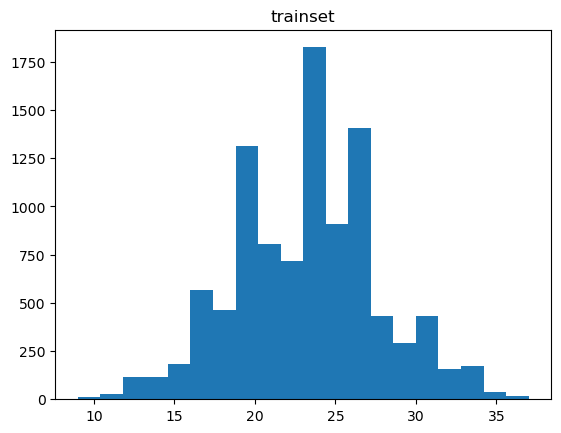

min/max : 9 37


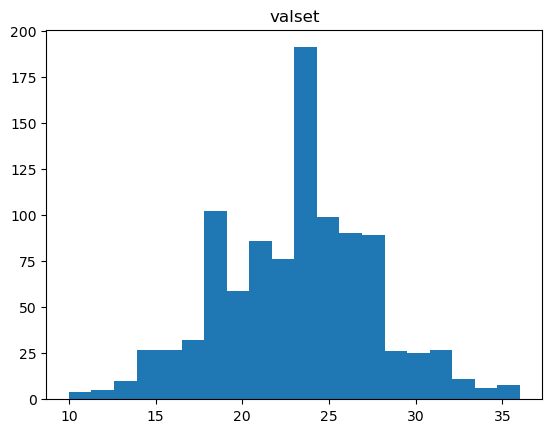

min/max : 10 36


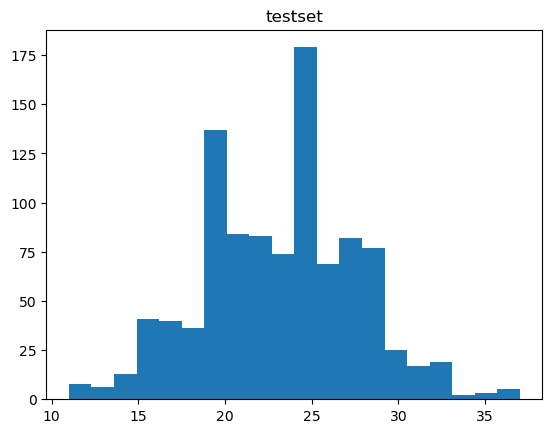

min/max : 11 37


In [12]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('min/max :',graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [13]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])


10000
1000
1000
(Graph(num_nodes=29, num_edges=64,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor([0.8350]))
(Graph(num_nodes=35, num_edges=78,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor([0.6299]))
(Graph(num_nodes=16, num_edges=34,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor([1.9973]))


In [14]:
num_atom_type = 28
num_bond_type = 4


In [15]:
start = time.time()
with open('data/molecules/ZINC.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test,num_atom_type,num_bond_type],f)
print('Time (sec):',time.time() - start)


Time (sec): 11.897607803344727


# Test load function

In [16]:
DATASET_NAME = 'ZINC'
dataset = LoadData(DATASET_NAME)
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset ZINC...
train, test, val sizes : 10000 1000 1000
[I] Finished loading.
[I] Data load time: 18.2899s


In [17]:
batch_size = 10
collate = MoleculeDataset.collate
print(MoleculeDataset)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)


<class 'data.molecules.MoleculeDataset'>


In [ ]:
os.chdir('./data/molecules/') # go to root folder of the project
print(os.getcwd())

# Download AqSol dataset

In [ ]:
if not os.path.isfile('aqsol_graph_raw.zip'):
    print('downloading..')
    !curl https://www.dropbox.com/s/lzu9lmukwov12kt/aqsol_graph_raw.zip?dl=1 -o aqsol_graph_raw.zip -J -L -k
    !unzip aqsol_graph_raw.zip -d ./
else:
    print('File already downloaded')

# Convert to DGL format and save with pickle

In [ ]:
os.chdir('../../') # go to root folder of the project
print(os.getcwd())

In [ ]:
DATASET_NAME = 'AqSol'
dataset = MoleculeDatasetDGL(DATASET_NAME)

In [ ]:
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')

In [ ]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])

In [ ]:
num_atom_type = dataset.num_atom_type
num_bond_type = dataset.num_bond_type

In [ ]:
start = time.time()
with open('data/molecules/AQSOL.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test,num_atom_type,num_bond_type],f)
print('Time (sec):',time.time() - start)

# Test load function

In [ ]:
DATASET_NAME = 'AQSOL'
dataset = LoadData(DATASET_NAME)
trainset, valset, testset = dataset.train, dataset.val, dataset.test

In [ ]:
batch_size = 10
collate = MoleculeDataset.collate
print(MoleculeDataset)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)